In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")
sns.set_style('whitegrid')
%matplotlib inline
plt.rcParams.update({'font.size': 15})
# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime
import yfinance as yf

In [2]:
# Plot Style
plt.rcParams.update({'font.size': 15})

In [3]:
# Step 1: Download Data
start_date = '2020-01-01'
end_date = '2021-12-31'
df0=yf.download('HMC',start_date,end_date)



[*********************100%***********************]  1 of 1 completed


In [4]:
# The  stocks we'll use for this analysis
tech_list = ['HMC', 'TSLA']

# Set up End and Start times for data grab

start = '2020-01-01'
end = '2021-12-31'

#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = yf.download(stock,  start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
company_list = [HMC, TSLA]
company_name = ["Honda", "Tesla"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2020-01-02,28.600000,28.650000,28.459999,28.639999,28.639999,262800,Honda
2020-01-03,28.250000,28.379999,28.080000,28.129999,28.129999,663600,Honda
2020-01-06,27.719999,28.059999,27.719999,28.049999,28.049999,463000,Honda
2020-01-07,28.389999,28.389999,28.180000,28.209999,28.209999,341800,Honda
2020-01-08,27.990000,28.219999,27.990000,28.129999,28.129999,264200,Honda
2020-01-09,28.180000,28.180000,27.950001,28.030001,28.030001,414700,Honda
2020-01-10,27.990000,27.990000,27.690001,27.719999,27.719999,343600,Honda
2020-01-13,27.820000,28.049999,27.750000,28.040001,28.040001,376000,Honda
2020-01-14,27.959999,28.020000,27.860001,27.879999,27.879999,407400,Honda


In [6]:
HMC.describe()

,Open,High,Low,Close,Adj Close,Volume
count,504.000000,504.000000,504.000000,504.000000,504.000000,5.040000e+02
mean,27.829821,28.009067,27.628929,27.823393,27.823393,8.089599e+05
std,2.992081,2.975222,3.019686,3.006704,3.006704,4.575857e+05
min,20.000000,20.120001,19.379999,19.860001,19.860001,2.097000e+05
25%,25.635000,25.825000,25.427500,25.597500,25.597500,5.214500e+05
50%,28.150000,28.305000,27.955000,28.150000,28.150000,7.039500e+05
75%,30.167500,30.412500,30.040001,30.250000,30.250000,9.555250e+05
max,33.290001,33.419998,33.259998,33.290001,33.290001,3.950600e+06


In [7]:
HMC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2020-01-02 to 2021-12-30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          504 non-null    float64
 1   High          504 non-null    float64
 2   Low           504 non-null    float64
 3   Close         504 non-null    float64
 4   Adj Close     504 non-null    float64
 5   Volume        504 non-null    int64  
 6   company_name  504 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 31.5+ KB


# Step 2: Visualize Data

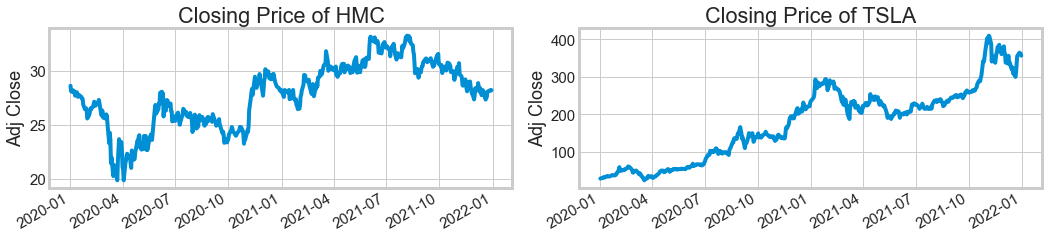

In [8]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

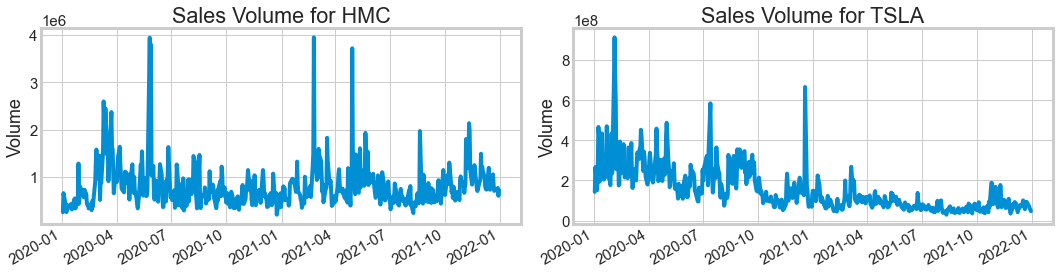

In [9]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

# Prediction using LSTM

In [10]:
# Get the stock quote
df_H = yf.download('HMC',start,end)
# Show teh data
df_H

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.600000,28.650000,28.459999,28.639999,28.639999,262800
2020-01-03,28.250000,28.379999,28.080000,28.129999,28.129999,663600
2020-01-06,27.719999,28.059999,27.719999,28.049999,28.049999,463000
2020-01-07,28.389999,28.389999,28.180000,28.209999,28.209999,341800
2020-01-08,27.990000,28.219999,27.990000,28.129999,28.129999,264200
...,...,...,...,...,...,...
2021-12-23,27.760000,28.129999,27.760000,28.080000,28.080000,731300
2021-12-27,28.000000,28.240000,27.900000,28.209999,28.209999,723200
2021-12-28,28.180000,28.350000,28.180000,28.200001,28.200001,773500


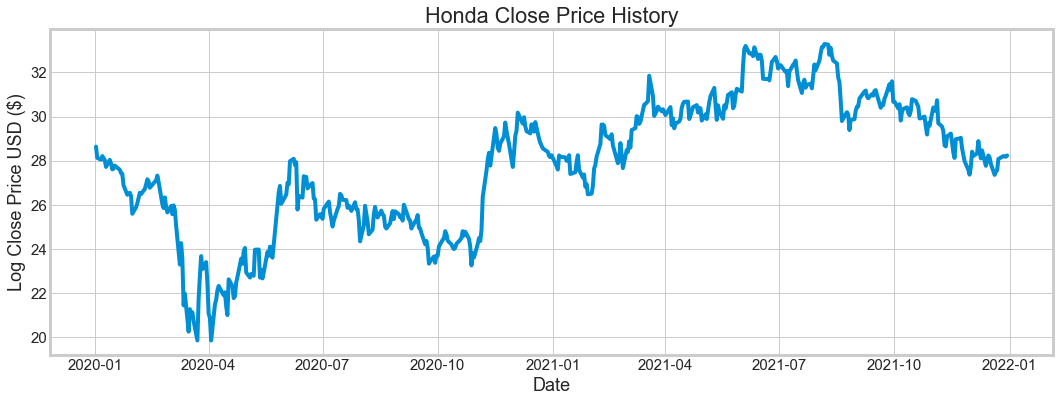

In [11]:
plt.figure(figsize=(16,6))
plt.title('Honda Close Price History')
plt.plot(df_H['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Log Close Price USD ($)', fontsize=18)
plt.show()

In [12]:
df_H.filter(['Close']).values

array([[28.63999939],
       [28.12999916],
       [28.04999924],
       [28.20999908],
       [28.12999916],
       [28.03000069],
       [27.71999931],
       [28.04000092],
       [27.87999916],
       [27.61000061],
       [27.63999939],
       [27.78000069],
       [27.59000015],
       [27.44000053],
       [27.40999985],
       [26.88999939],
       [26.45999908],
       [26.48999977],
       [26.54999924],
       [26.40999985],
       [25.60000038],
       [25.88999939],
       [26.06999969],
       [26.30999947],
       [26.54999924],
       [26.48999977],
       [26.71999931],
       [26.92000008],
       [27.15999985],
       [27.07999992],
       [26.78000069],
       [27.04999924],
       [27.07999992],
       [27.32999992],
       [27.04999924],
       [26.04000092],
       [25.86000061],
       [26.34000015],
       [25.92000008],
       [25.65999985],
       [25.95000076],
       [25.57999992],
       [25.97999954],
       [25.78000069],
       [25.06999969],
       [23

## split the data into trainset and testset 80:20

In [13]:
# Create a new dataframe with only the 'Close column 
data= df_H.filter(['Close'])
# Convert the dataframe to a numpy array
datasetH = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(datasetH) * .80 ))

training_data_len

404

In [14]:
len(datasetH)

504

## normalizing the data

In [15]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_dataH = scaler.fit_transform(datasetH)

scaled_dataH

array([[0.65376013],
       [0.61578543],
       [0.60982863],
       [0.62174224],
       [0.61578543],
       [0.60833953],
       [0.58525678],
       [0.60908415],
       [0.59717039],
       [0.57706626],
       [0.57929997],
       [0.58972449],
       [0.57557702],
       [0.56440802],
       [0.56217417],
       [0.52345485],
       [0.49143696],
       [0.49367081],
       [0.49813838],
       [0.48771401],
       [0.42740131],
       [0.44899469],
       [0.46239754],
       [0.48026796],
       [0.49813838],
       [0.49367081],
       [0.51079662],
       [0.5256887 ],
       [0.54355913],
       [0.53760232],
       [0.51526433],
       [0.53536846],
       [0.53760232],
       [0.55621736],
       [0.53536846],
       [0.46016382],
       [0.44676097],
       [0.48250182],
       [0.45122854],
       [0.43186888],
       [0.4534624 ],
       [0.42591208],
       [0.45569611],
       [0.44080417],
       [0.38793738],
       [0.25614286],
       [0.3283693 ],
       [0.275

In [16]:
scaled_dataH.shape

(504, 1)

In [17]:

# Create the scaled training data set
train_data = scaled_dataH[0:404, :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.65376013, 0.61578543, 0.60982863, 0.62174224, 0.61578543,
       0.60833953, 0.58525678, 0.60908415, 0.59717039, 0.57706626,
       0.57929997, 0.58972449, 0.57557702, 0.56440802, 0.56217417,
       0.52345485, 0.49143696, 0.49367081, 0.49813838, 0.48771401,
       0.42740131, 0.44899469, 0.46239754, 0.48026796, 0.49813838,
       0.49367081, 0.51079662, 0.5256887 , 0.54355913, 0.53760232,
       0.51526433, 0.53536846, 0.53760232, 0.55621736, 0.53536846,
       0.46016382, 0.44676097, 0.48250182, 0.45122854, 0.43186888,
       0.4534624 , 0.42591208, 0.45569611, 0.44080417, 0.38793738,
       0.25614286, 0.3283693 , 0.27550251, 0.11839167, 0.15785546,
       0.02978404, 0.10573344, 0.08265068, 0.09530892, 0.06552488,
       0.        , 0.13998504, 0.21742368, 0.2844378 , 0.24050629])]
[0.26433351871871613]

[array([0.65376013, 0.61578543, 0.60982863, 0.62174224, 0.61578543,
       0.60833953, 0.58525678, 0.60908415, 0.59717039, 0.57706626,
       0.57929997, 0.58972449, 0.57

In [18]:
len(x_train)


344

In [19]:
len(y_train)

344

In [20]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
dh=model.fit(x_train, y_train, batch_size=100, epochs=100,verbose=2).history

model.summary()


Epoch 1/100
4/4 - 4s - loss: 0.1400 - 4s/epoch - 1s/step
Epoch 2/100
4/4 - 1s - loss: 0.0386 - 642ms/epoch - 161ms/step
Epoch 3/100
4/4 - 1s - loss: 0.0193 - 755ms/epoch - 189ms/step
Epoch 4/100
4/4 - 1s - loss: 0.0167 - 763ms/epoch - 191ms/step
Epoch 5/100
4/4 - 1s - loss: 0.0086 - 692ms/epoch - 173ms/step
Epoch 6/100
4/4 - 1s - loss: 0.0109 - 787ms/epoch - 197ms/step
Epoch 7/100
4/4 - 1s - loss: 0.0073 - 657ms/epoch - 164ms/step
Epoch 8/100
4/4 - 1s - loss: 0.0083 - 569ms/epoch - 142ms/step
Epoch 9/100
4/4 - 1s - loss: 0.0064 - 775ms/epoch - 194ms/step
Epoch 10/100
4/4 - 1s - loss: 0.0067 - 651ms/epoch - 163ms/step
Epoch 11/100
4/4 - 1s - loss: 0.0056 - 623ms/epoch - 156ms/step
Epoch 12/100
4/4 - 1s - loss: 0.0055 - 654ms/epoch - 163ms/step
Epoch 13/100
4/4 - 1s - loss: 0.0051 - 654ms/epoch - 163ms/step
Epoch 14/100
4/4 - 1s - loss: 0.0050 - 622ms/epoch - 156ms/step
Epoch 15/100
4/4 - 1s - loss: 0.0049 - 668ms/epoch - 167ms/step
Epoch 16/100
4/4 - 1s - loss: 0.0048 - 576ms/epoch - 14

In [21]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________
None


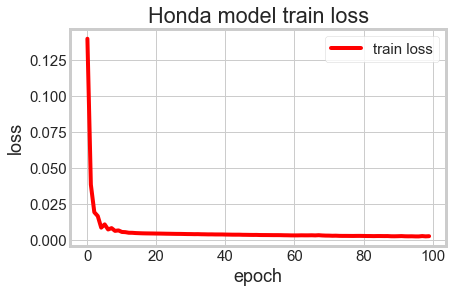

In [28]:
plt.plot(dh['loss'], color = 'red')

plt.title('Honda model train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss'], loc='upper right')
plt.show()

In [23]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_dataH[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = datasetH[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4/4 [==============================] - 1s 54ms/step


0.5357807574979395

In [24]:
 #Get the root mean squared error (RMSE) for training set

predictions_train = model.predict(x_train)
predictions_train = scaler.inverse_transform(predictions_train)
y_train2 = datasetH[60:training_data_len, :]
rmse_train = np.sqrt(np.mean(((predictions_train - y_train2) ** 2)))
rmse_train

11/11 [==============================] - 1s 49ms/step


0.6645195258775238

In [25]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(predictions,y_test)
mape = mean_absolute_percentage_error(predictions,y_test)
rmse = np.sqrt(mean_squared_error(predictions,y_test))

print(f'mae - Honda: {mae}')
print(f'mape - Honda: {mape}')
print(f'rmse - Honda: {rmse}')

mae - Honda: 0.42569814682006835
mape - Honda: 0.01418042887288038
rmse - Honda: 0.5357807574979395


<ipython-input-26-bffdb1ade06d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


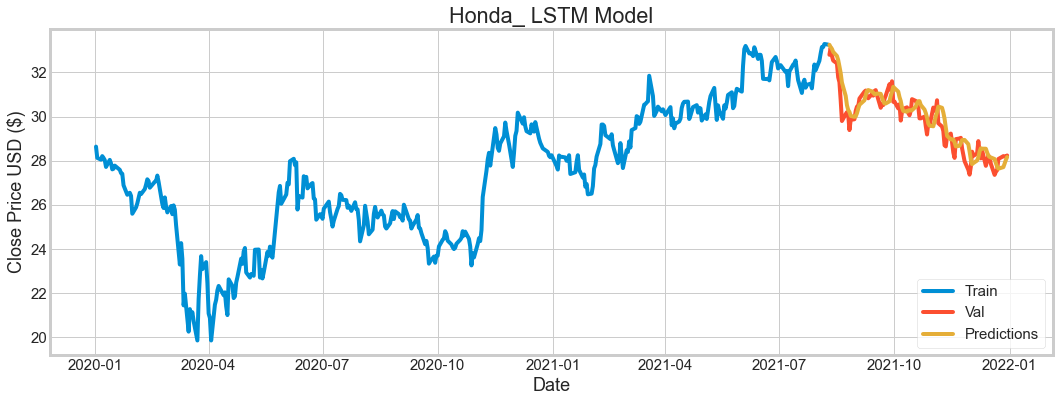

In [26]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Honda_ LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'][:])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [27]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-08-10,32.799999,33.253468
2021-08-11,33.119999,33.145523
2021-08-12,32.750000,33.070705
2021-08-13,32.540001,32.929474
2021-08-16,32.410000,32.746895
...,...,...
2021-12-23,28.080000,27.640623
2021-12-27,28.209999,27.712093
2021-12-28,28.200001,27.872583
